In [1]:
import pandas as pd
import numpy as np
import random

# List of common symptoms
symptoms = ['fever', 'cough', 'vomiting', 'fatigue', 'headache', 'chest_pain', 'breathing_difficulty']

# Generate 100 samples
data = []
for _ in range(100):
    symptom_values = [random.randint(0, 1) for _ in symptoms]
    # Calculate a simple severity score (you can modify this logic)
    score = sum(symptom_values) * 15 + random.randint(-5, 5)  # scale to 0-100
    score = min(100, max(10, score))  # keep within 10-100
    data.append(symptom_values + [score])

# Create DataFrame
df = pd.DataFrame(data, columns=symptoms + ['Severity_Score'])

# Save to CSV
df.to_csv('DS.csv', index=False)
print("✅ Dataset saved as 'DS.csv'")
df.head(3)


✅ Dataset saved as 'DS.csv'


,fever,cough,vomiting,fatigue,headache,chest_pain,breathing_difficulty,Severity_Score
0,1,1,1,0,1,1,0,77
1,0,1,1,0,0,1,1,65
2,0,1,0,0,0,1,1,46


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('DS.csv')
print(df.head())
print(df.describe())
print(df.info())


   fever  cough  vomiting  fatigue  headache  chest_pain  \
0      1      1         1        0         1           1   
1      0      1         1        0         0           1   
2      0      1         0        0         0           1   
3      1      0         1        0         0           1   
4      0      0         0        1         1           1   

   breathing_difficulty  Severity_Score  
0                     0              77  
1                     1              65  
2                     1              46  
3                     1              61  
4                     1              65  
            fever      cough    vomiting     fatigue  headache  chest_pain  \
count  100.000000  100.00000  100.000000  100.000000    100.00  100.000000   
mean     0.500000    0.43000    0.530000    0.470000      0.55    0.520000   
std      0.502519    0.49757    0.501614    0.501614      0.50    0.502117   
min      0.000000    0.00000    0.000000    0.000000      0.00    0.000000 

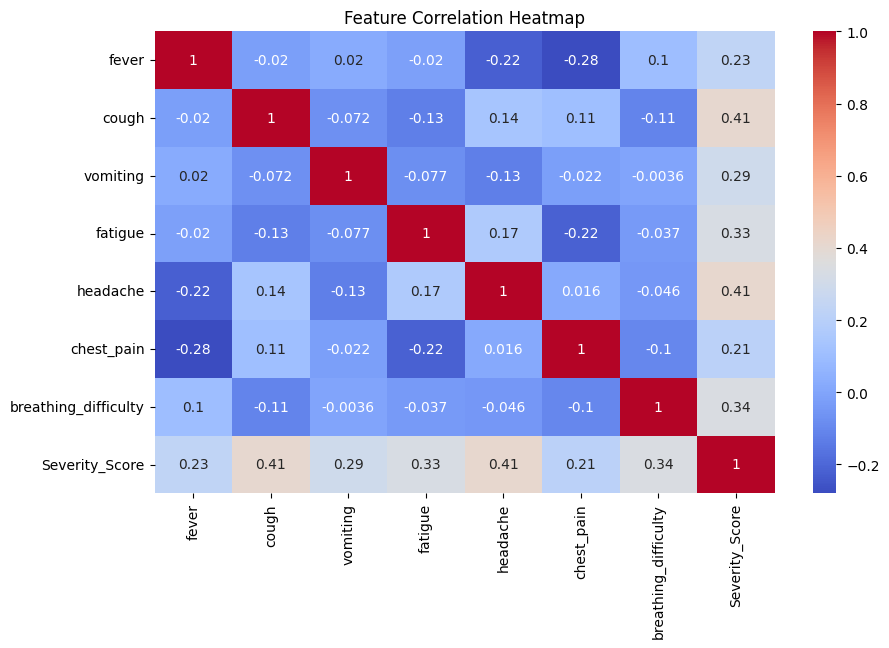

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


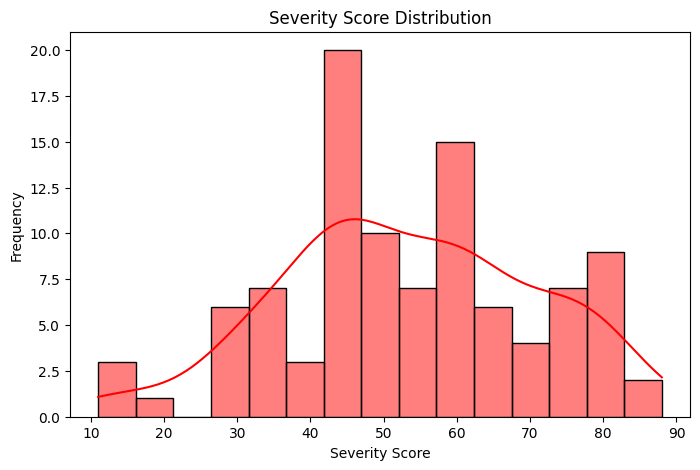

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Severity_Score'], bins=15, kde=True, color='Red')
plt.xlabel('Severity Score')
plt.ylabel('Frequency')
plt.title("Severity Score Distribution")
plt.show()


In [6]:
X = df.drop('Severity_Score', axis=1)
y = df['Severity_Score']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

print("Linear Regression Evaluation:")
evaluate(lr, X_test, y_test)

print("\nRandom Forest Regressor Evaluation:")
evaluate(rf, X_test, y_test)


Linear Regression Evaluation:
RMSE: 10.93
R² Score: 0.97

Random Forest Regressor Evaluation:
RMSE: 83.35
R² Score: 0.74


In [11]:
!pip install pytesseract pillow


In [14]:
from PIL import Image
import pytesseract

# Replace with your actual image path
image_path = "DR1.png"

# Extract text
text = pytesseract.image_to_string(Image.open('DR1.png'))
print("Extracted Report Text: \n", text)


Extracted Report Text: 
 Baroda

Unipath

SPECIALTY LABORATORY

ly Laboratory (Baroda) LLP - Platinum Complex, Opp. HOFC Bank, Nr. Radhe Kishna char ast, Akota, Vadodora - 290020
Phone: 0265.2354435 / 2326260 | Mobile: 7228800500 / 8155028222 | Emil ifo.borode@unipatllp.in

 

 

 

 

 

 

 

 

TTT TESTREPORT Status : Final
Registration No. : 1056402396 Reg, Date: 26-May-2021 2020 Collected On: 28-May-2027 20:20
Patient Name: Mr. NIKHIL GOYAL Approved on: 26-May-2021 21:49
Age 30 Years Gender: Male Dispatch At
Ret. By : Or. RASESH DESAI Tele No. + 7600387698
Location : HID /1PD ,

Test Name Results Units Bio. Ret. interval

RANDOM GLUGOSE
RANDOM PLASMA GLUCOSE 8 mg/d >= 200 Suggestive of Diabetes

 

‘Sample Type:Plasma

Note:
Ifthe patient Random Plasma Glucose value Is>=200 mld. Advice Oral Glocse Tolerence test (OGTT) for Further Evaluation,
CCiteria for the agnosis of diabetes:

 

LHbAic>/= 65°
oO

2. Fasting plasma glucose >126 gma. Fasting is defined as no caloric Intake atle

In [15]:
import re

def extract_patient_name(text):
    # Match lines like: "Patient Name: Mr. Nikhil Goyal" or "Name - Dr. S. R. Sharma"
    pattern = r"(?:Patient Name|Name)[:\- ]+\s*([A-Za-z.\s]+)"
    match = re.search(pattern, text)
    if match:
        name = match.group(1).strip()
        # Clean up trailing garbage or OCR artifacts
        name = re.sub(r'[^A-Za-z.\s]', '', name)
        return name.strip()
    return "Unknown"

# Example usage:
patient_name = extract_patient_name(text)
print("🧍 Patient Name:", patient_name)


🧍 Patient Name: Mr. NIKHIL GOYAL Approved on


In [16]:
symptom_list = ['fever', 'cough', 'vomiting', 'fatigue', 'headache',' Diabetes' 'chest_pain', 'breathing_difficulty']

def extract_symptoms_from_text(text, symptom_list):
    text = text.lower()
    return [symptom for symptom in symptom_list if symptom.replace('_', ' ') in text]

extracted_symptoms = extract_symptoms_from_text(text, symptom_list)
print("Extracted Symptoms:", extracted_symptoms)



Extracted Symptoms: []


In [18]:
def symptoms_to_input_vector(symptom_list, extracted_symptoms):
    return [[1 if symptom in extracted_symptoms else 0 for symptom in symptom_list]]

input_vector = symptoms_to_input_vector(symptom_list, extracted_symptoms)


In [19]:
# rf = your trained RandomForestRegressor model
predicted_score = rf.predict(input_vector)[0]
print("Predicted Severity Score:", round(predicted_score, 2))


Predicted Severity Score: 20.25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
def get_diagnosis(score):
    if score <= 30:
        return 'Mild – Home Care'
    elif score <= 70:
        return 'Moderate – Doctor Recommended'
    else:
        return 'Severe – Emergency Attention Needed'

df_result = pd.DataFrame({
    'Patient Name': [patient_name],
    'Extracted Symptoms': [", ".join(extracted_symptoms)],
    'Predicted Severity Score': [round(predicted_score, 2)],
    'Diagnosis': [get_diagnosis(predicted_score)]
})
df_result.to_excel("diagnosis_result.xlsx", index=False)
